In [40]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from statsmodels.api import add_constant, OLS
from statsmodels.formula.api import ols

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [41]:
#funcion para graficar relaciones de las distintas columnas con precio

def plot_regression_model(x,y):
    
    x_const = add_constant(x) # add a constant to the model
    
    modelo = OLS(y, x_const).fit() # fit the model
    
    pred = modelo.predict(x_const) # make predictions
    
    print(modelo.summary());
    try:
        const = modelo.params[0] # create a variable with the value of the constant given by the summary
        coef = modelo.params[1] # create a variable with the value of the coef given by the summary

        x_l=np.linspace(x.min(), x.max(), 50) 
        y_l= coef*x_l + const # function of the line

        plt.figure(figsize=(10, 10));

        # plot the line
        plt.plot(x_l, y_l, label=f'{x.name} vs {y.name}={coef}*{x.name}+{const}');

        # data
        plt.scatter(x, y, marker='x', c='g', label=f'{x.name} vs {y.name}');

        plt.title('Regresion lineal')
        plt.xlabel(f'{x.name}')
        plt.ylabel(f'{y.name}')
        plt.legend()
        plt.show();
        return modelo
    except:
        print('No se puede imprimir la recta de regresión para modelos multivariable')
        plt.show();
        return modelo

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:06:20   Log-Likelihood:            -3.0101e+05
No. Observations:               21597   AIC:                         6.020e+05
Df Residuals:                   21595   BIC:                         6.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.061e+06   1.23e+04    -86.396      0.0

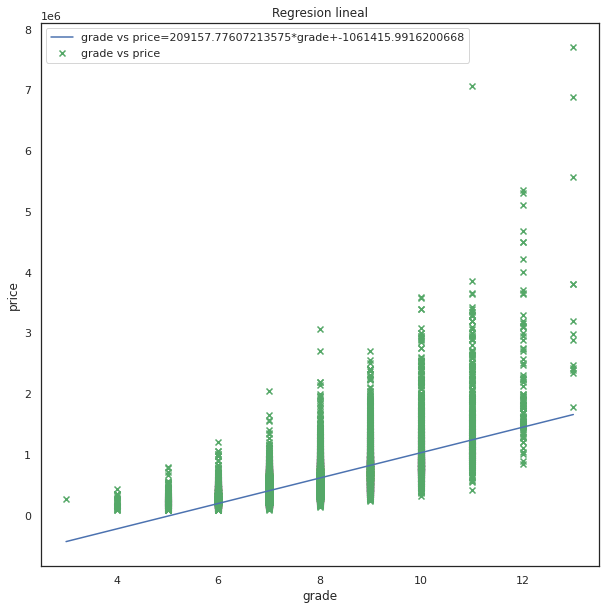

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                 1.484e+04
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:06:21   Log-Likelihood:            -3.0174e+05
No. Observations:               21597   AIC:                         6.035e+05
Df Residuals:                   21595   BIC:                         6.035e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.354e-10   4835

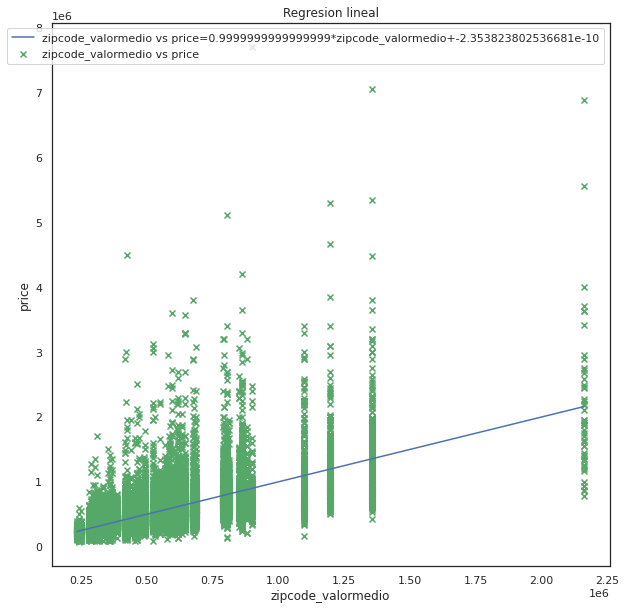

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:06:22   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

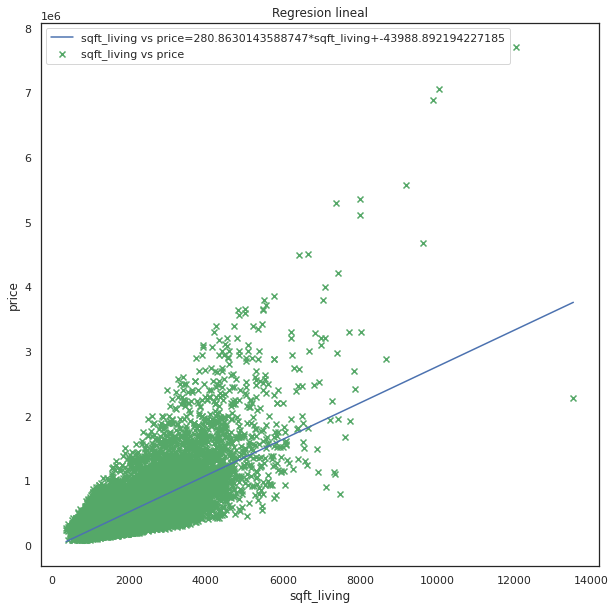

In [42]:
X = casas_regr.drop("price", axis = 1)
y = casas_regr.price

for i in X:
  plot_regression_model(X[i], y)

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17277, 3), (4320, 3), (17277,), (4320,))

In [47]:
ln = LinearRegression()

In [48]:
ln.fit(X_train, y_train)

LinearRegression()

In [49]:
preds =ln.predict(X_test)

In [50]:
ln.coef_

array([5.05198984e+04, 7.03406818e-01, 1.82758979e+02])

In [51]:
ln.intercept_

-605951.7943101639

In [52]:
ln.score(X_train, y_train)

(0.70477788938729, 0.70477788938729, 0.70477788938729)

In [53]:
ln.score(X_test, y_test)

(0.7055240775802436, 0.7055240775802436, 0.7055240775802436)